In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
date_max = session.query(func.max(Measurement.date)).all()
input_latest = date_max[0][0].split("-")
input_latest = [int(x) for x in input_latest]
print(input_latest)

[2017, 8, 23]


In [77]:
#view fields
date_new = session.query(Measurement).first()
print(date_new.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fbaf8124bd0>, 'station': 'USC00519397', 'prcp': 0.08, 'id': 1, 'date': '2010-01-01', 'tobs': 65.0}


In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_back = dt.date(*input_latest) - dt.timedelta(days=365)
one_year_str = one_year_back.strftime("%Y-%m-%d")
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_str)\
.order_by(Measurement.date.desc()).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_prcp_df = pd.DataFrame(year_precip, columns=['date','precipitation']).convert_dtypes()

# Sort the dataframe by date
year_prcp_df = year_prcp_df.sort_values('date')
year_prcp_df
# Use Pandas Plotting with Matplotlib to plot the data

,date,precipitation
2222,2016-08-24,1.45
2216,2016-08-24,0.08
2217,2016-08-24,2.15
2221,2016-08-24,2.15
2219,2016-08-24,NaN
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


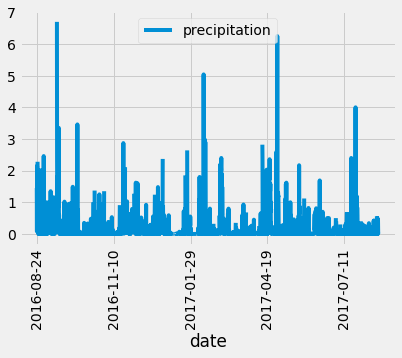

In [103]:
year_prcp_df.plot(x='date', y='precipitation', rot=90)
plt.show()

In [107]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = year_prcp_df.describe()
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [110]:
# Design a query to calculate the total number of stations in the dataset
first_val = session.query(Station).first()
first = total_stations.__dict__
first

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fbb48b99b10>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [118]:
total_stations = session.query(func.count(Station.station)).all()
total_stations[0][0]

9

In [129]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [130]:
most_active = active_stations[0][0]
most_active

'USC00519281'

Station USC00519281 has the most observations in the dataset, with 2772 observations

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

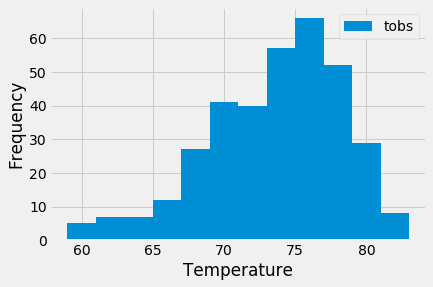

In [148]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp_most_active = session.query(Measurement.tobs)\
.filter(Measurement.station == most_active).filter(Measurement.date > one_year_str).all()
df_year_temp = pd.DataFrame(year_temp_most_active, columns=['tobs'])
df_year_temp.plot.hist(by='tobs',bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [149]:
# Close Session
session.close()